In [1]:
import yfinance as yf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Pull VIX historical data
ticker = "^VIX"

vix_history = yf.download(ticker, start='2018-01-01',progress=False)
vix_history = vix_history.asfreq(freq='D').ffill().dropna()
vix_history.to_csv('resources/vix.csv')
vix_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-23,22.709999,28.270000,22.620001,28.209999,28.209999,0.0
2022-04-24,22.709999,28.270000,22.620001,28.209999,28.209999,0.0
2022-04-25,30.040001,31.600000,26.799999,27.020000,27.020000,0.0
2022-04-26,27.379999,33.810001,27.059999,33.520000,33.520000,0.0
2022-04-27,31.110001,32.770000,29.820000,31.600000,31.600000,0.0


In [3]:
# Pull S&P 500 historical data
ticker = "^GSPC" 

sp_history = yf.download(ticker, start='2018-01-01',progress=False)
sp_history = sp_history.asfreq(freq='D').ffill().dropna()
sp_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-23,4385.830078,4385.830078,4267.620117,4271.779785,4271.779785,3.930660e+09
2022-04-24,4385.830078,4385.830078,4267.620117,4271.779785,4271.779785,3.930660e+09
2022-04-25,4255.339844,4299.020020,4200.819824,4296.120117,4296.120117,4.061070e+09
2022-04-26,4278.140137,4278.140137,4175.040039,4175.200195,4175.200195,3.760420e+09
2022-04-27,4186.520020,4240.709961,4162.899902,4183.959961,4183.959961,3.876340e+09


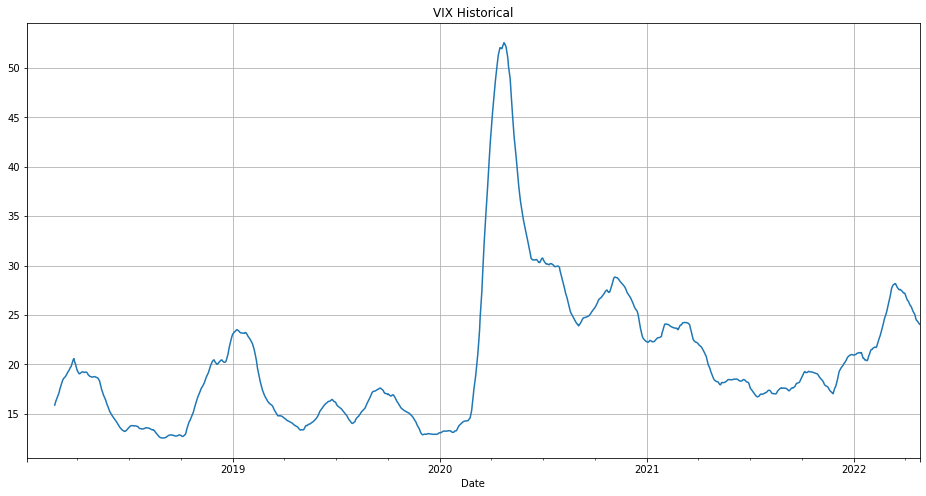

In [6]:
#Plot VIX 50-day rolling average
vix_plot = vix_history['Adj Close'].rolling(window=50).mean().plot(figsize=(16,8), title='VIX Historical', grid=True)

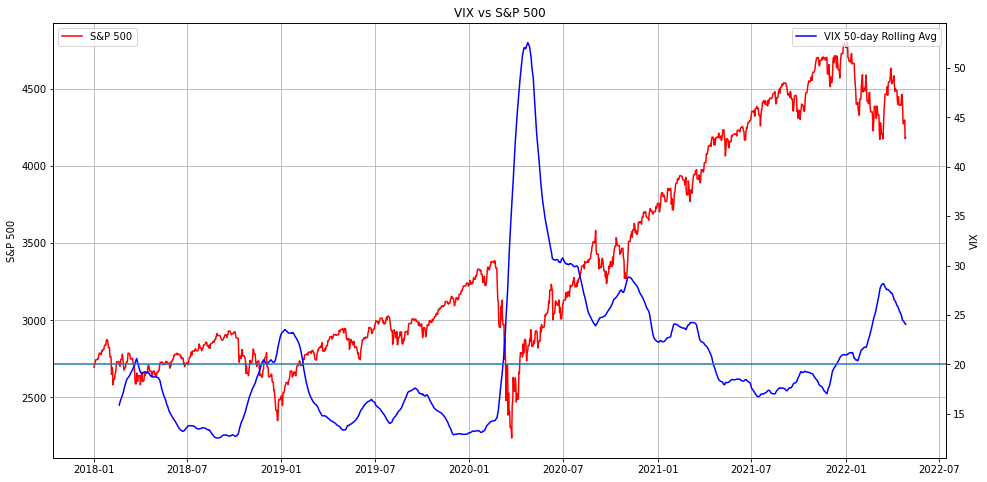

In [7]:
# Compare VIX to S&P Index and locate points where VIX crosses y value of 20 (arbitrarily selected) which is seen as fearful market
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(sp_history['Adj Close'], label ='S&P 500', color='r')
ax.set_ylabel('S&P 500')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(vix_history['Adj Close'].rolling(window=50).mean(), label='VIX 50-day Rolling Avg', color='b')
ax2.set_title('VIX vs S&P 500')
ax2.set_ylabel('VIX')
ax2.legend(loc='upper right')
ax2.axhline(y=20)